<a href="https://colab.research.google.com/github/RubenvdList/Winc-Assignments/blob/main/CO2_emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1850      AFG   3752993.0  NaN         NaN   
1  Afghanistan  1851      AFG   3767956.0  NaN         NaN   
2  Afghanistan  1852      AFG   3783940.0  NaN         NaN   
3  Afghanistan  1853      AFG   3800954.0  NaN         NaN   
4  Afghanistan  1854      AFG   3818038.0  NaN         NaN   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    NaN  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1                     NaN                                 0.165   

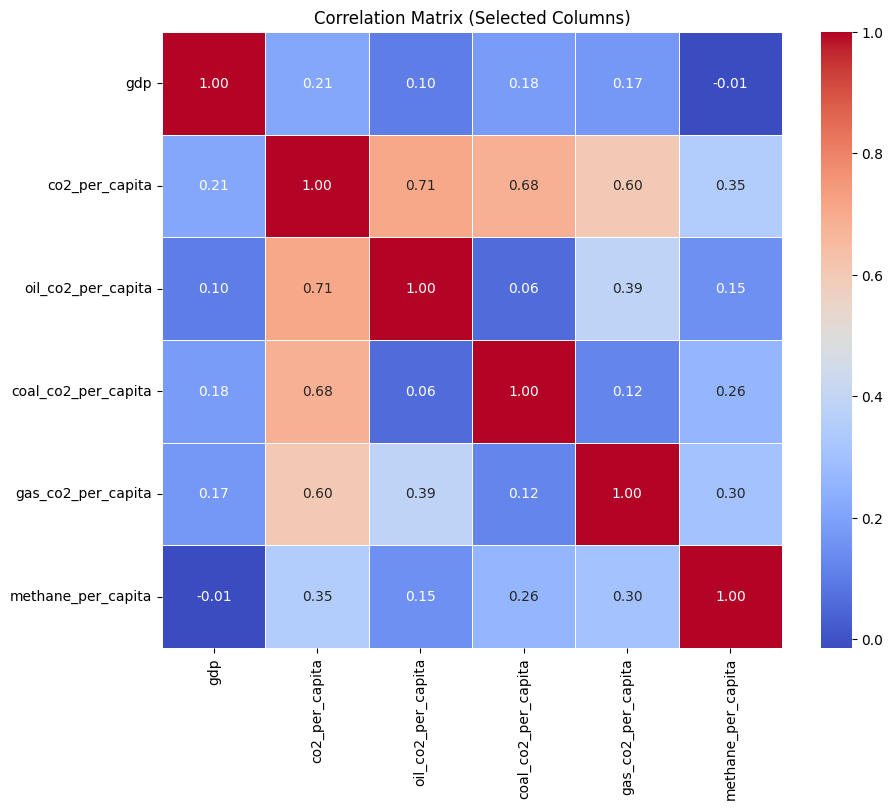

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
data = pd.read_csv(url)

print(data.head())

print("Missing values:\n", data.isnull().sum())

data_cleaned = data.dropna().copy()

print("\nData types and basic statistics:\n", data_cleaned.dtypes, data_cleaned.describe())

selected_columns = ['gdp', 'co2_per_capita', 'oil_co2_per_capita', 'coal_co2_per_capita', 'gas_co2_per_capita', 'methane_per_capita']

data_subset = data_cleaned[selected_columns]

correlation_matrix_subset = data_subset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_subset, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix (Selected Columns)")
plt.show()


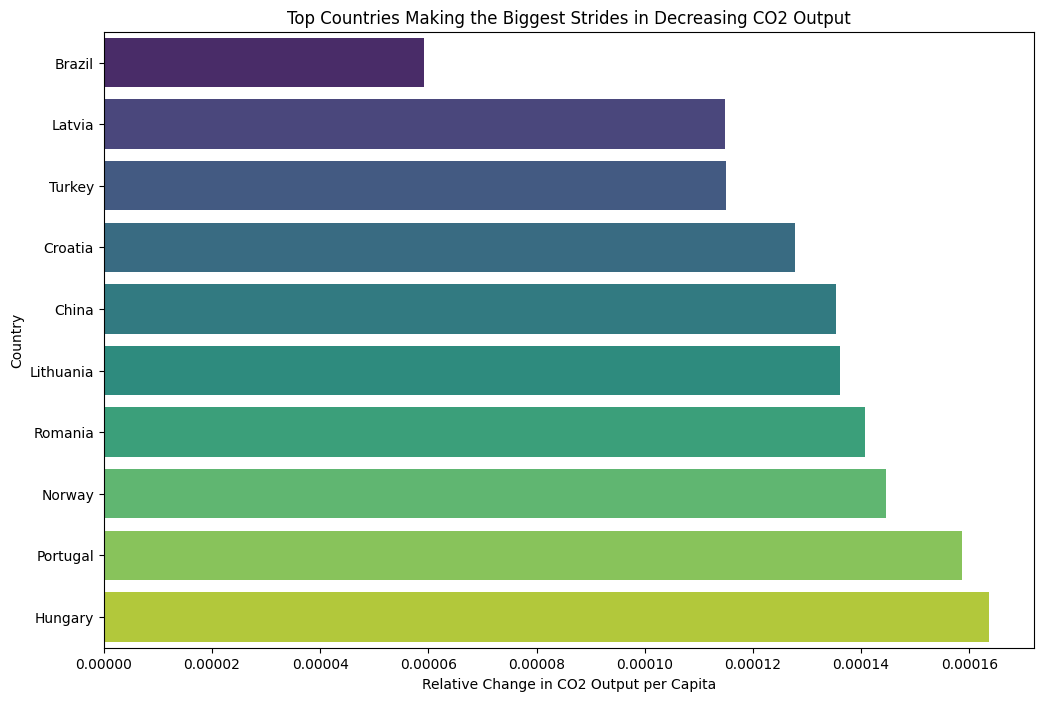

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
data = pd.read_csv(url)

data_cleaned = data.dropna().copy()

data_cleaned['relative_co2_per_capita'] = data_cleaned['co2'] / data_cleaned['population']

country_totals = data_cleaned.groupby('country').agg({
    'co2': 'sum',
    'population': 'mean',
}).reset_index()

country_totals['relative_change'] = country_totals['co2'] / country_totals['population']

top_countries = country_totals.sort_values(by='relative_change', ascending=True).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='relative_change', y='country', data=top_countries, palette='viridis')
plt.title("Top Countries Making the Biggest Strides in Decreasing CO2 Output")
plt.xlabel("Relative Change in CO2 Output per Capita")
plt.ylabel("Country")
plt.show()




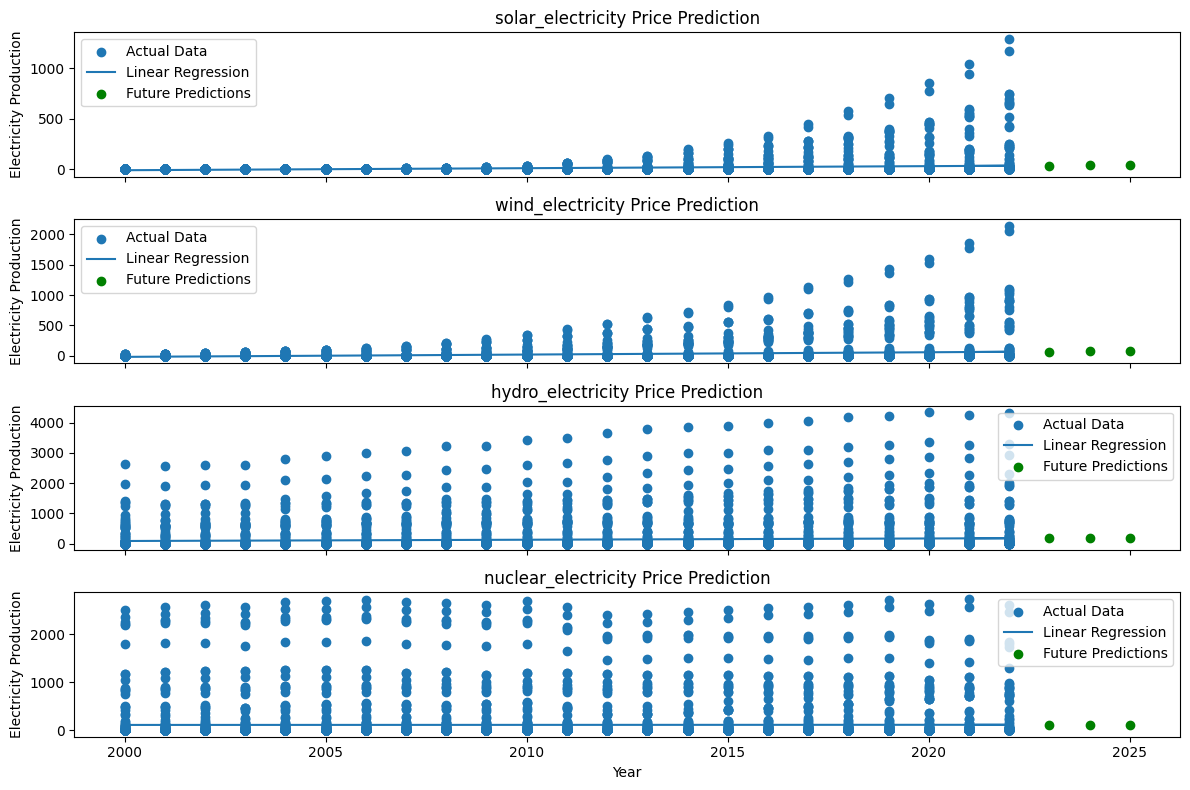

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

energy_url = "https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv"
energy_data = pd.read_csv(energy_url)

selected_columns = [
    'year',
    'solar_electricity',
    'wind_electricity',
    'hydro_electricity',
    'nuclear_electricity',
]

data_subset = energy_data[energy_data['year'] >= 2000][selected_columns]

data_subset = data_subset.dropna()

non_fossil_fuel_technologies = [
    'solar_electricity',
    'wind_electricity',
    'hydro_electricity',
    'nuclear_electricity',
]

fig, axes = plt.subplots(nrows=len(non_fossil_fuel_technologies), ncols=1, figsize=(12, 8), sharex=True)

for i, technology in enumerate(non_fossil_fuel_technologies):

    X = data_subset['year'].values.reshape(-1, 1)
    y = data_subset[technology]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    future_years = [[2023], [2024], [2025]]
    future_prices = model.predict(future_years)

    axes[i].scatter(X, y, label='Actual Data')
    axes[i].plot(X, model.predict(X), label='Linear Regression')
    axes[i].scatter(future_years, future_prices, color='green', label='Future Predictions')

    axes[i].set_title(f"{technology} Price Prediction")
    axes[i].set_ylabel('Electricity Production')
    axes[i].legend()

plt.xlabel('Year')
plt.tight_layout()
plt.show()


